--2020-12-03 22:02:32--  https://github.com/Henry-Medeiros/images/raw/master/holes1.png
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Henry-Medeiros/images/master/holes1.png [following]
--2020-12-03 22:02:32--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/holes1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86726 (85K) [image/png]
Saving to: ‘holes1.png.6’

holes1.png.6        100%[===================>]  84.69K  --.-KB/s    in 0.01s   

2020-12-03 22:02:32 (5.56 MB/s) - ‘holes1.png.6’ saved [86726/86726]



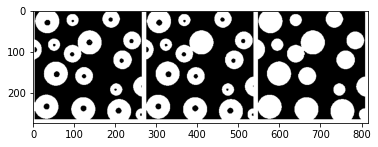

In [38]:
import cv2
import scipy
import matplotlib.pyplot as plt
from IPython.display import Image, display
import numpy as np
!wget 'https://github.com/Henry-Medeiros/images/raw/master/holes1.png'
img = cv2.imread('holes1.png',0)
thr, img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

plt.imshow(img,'gray')
plt.show()

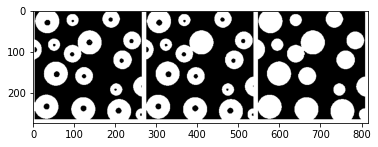

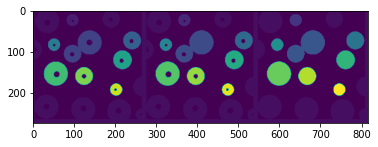

[]

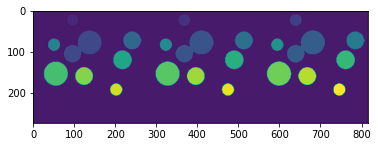

In [39]:
#watershed Segmentation
import cv2
from skimage.filters.thresholding import threshold_otsu

thresh = threshold_otsu(np.asarray(img))

img_thr = 255 * (img > thresh)
plt.imshow(img_thr, 'gray')
plt.show()

# img_thr = np.uint8(img_thr)
ret, markers = cv2.connectedComponents(img_thr.astype(np.uint8))

plt.imshow(markers)
plt.show()
# cv2.watershed requires a 3-channel image

img_conv = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img_ws = cv2.watershed(img_conv, markers)

plt.imshow(img_ws)
plt.plot()



With erosion

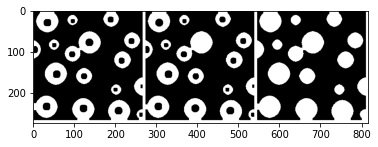

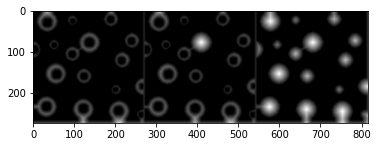

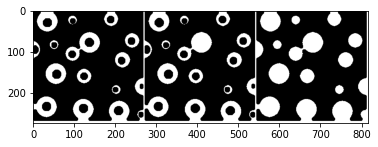

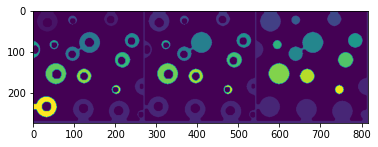

[]

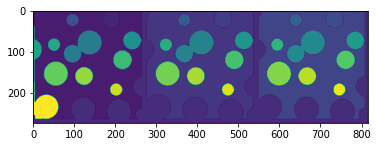

In [40]:
#watershed Segmentation
import cv2
from skimage.filters.thresholding import threshold_otsu


b2 = cv2.erode(img, None, iterations = 2)

dist_trans = cv2.distanceTransform(b2,2,3)

plt.imshow(b2, 'gray')
plt.show()

plt.imshow(dist_trans, 'gray')
plt.show()

thresh , dt = cv2.threshold(dist_trans, 2, 255, cv2.THRESH_BINARY)

plt.imshow(dt, 'gray')
plt.show()

# img_thr = np.uint8(img_thr)
ret, markers = cv2.connectedComponents(dt.astype(np.uint8))

plt.imshow(markers)
plt.show()
# cv2.watershed requires a 3-channel image

img_conv = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img_ws = cv2.watershed(img_conv, markers)

plt.imshow(img_ws)
plt.plot()

Dilation : used to combine objects that are close
enough to each other but are not connected (grow )


Erosion: used to shrink objects in an image by removing pixels from the boundary of that object ( i want edge thinner but object remain connected)

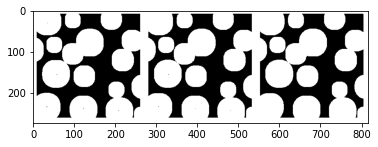

In [41]:
# need binirized image inorder to dilation in opencv
thr, img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
se = np.ones((10,10))
img_dilate = cv2.dilate(img,se)
plt.imshow(255*img_dilate, 'gray')
plt.show()

Opening o: Erosion followed by Dilation


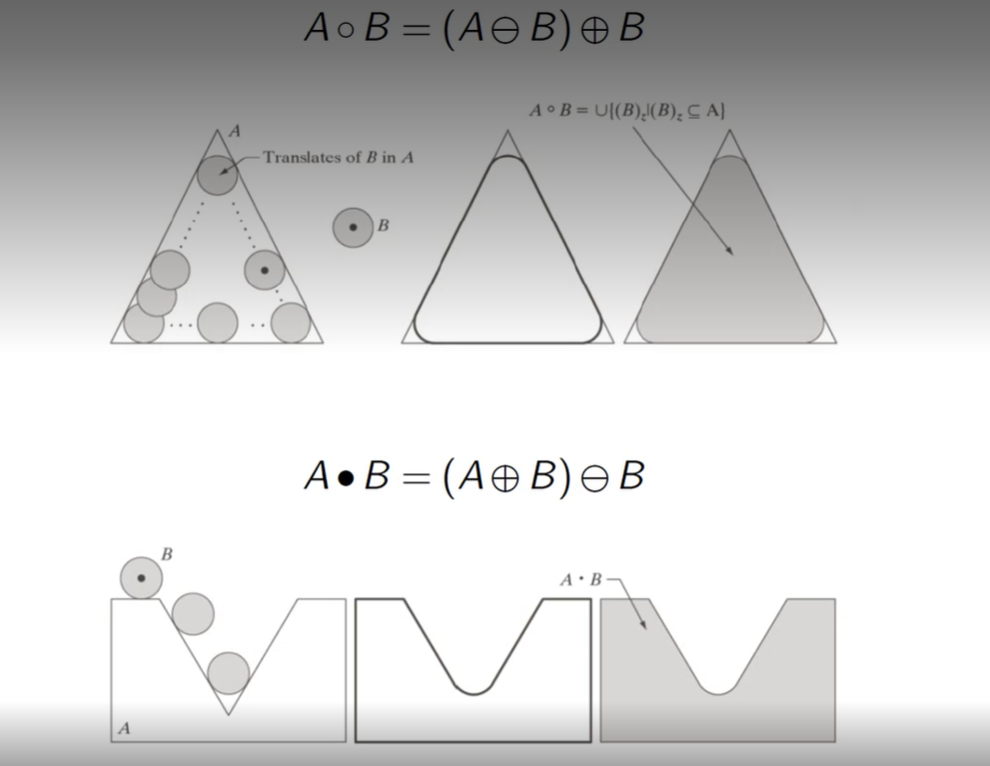

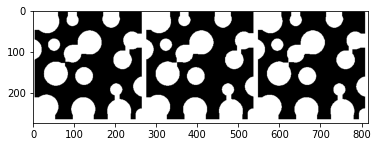

In [42]:
thr, img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

se = np.ones((11,11), np.uint8)

img_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE,se)

plt.imshow(255*img_close,'gray')
plt.show()

--2020-12-03 22:05:57--  https://github.com/Henry-Medeiros/images/raw/master/boundary.png
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Henry-Medeiros/images/master/boundary.png [following]
--2020-12-03 22:05:57--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/boundary.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33326 (33K) [image/png]
Saving to: ‘boundary.png.3’

boundary.png.3      100%[===================>]  32.54K  --.-KB/s    in 0.004s  

2020-12-03 22:05:57 (8.78 MB/s) - ‘boundary.png.3’ saved [33326/33326]



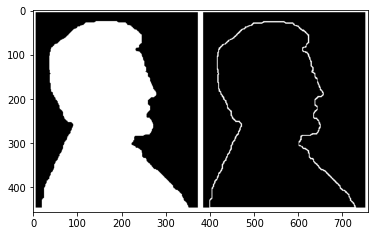

In [55]:
!wget 'https://github.com/Henry-Medeiros/images/raw/master/boundary.png'
img = cv2.imread('boundary.png',0)
thr, img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

plt.imshow(img,'gray')
plt.show()

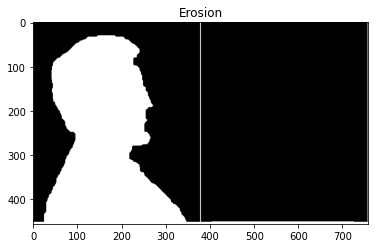

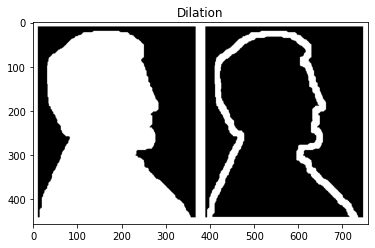

In [44]:
thr, img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

se = np.ones((11,11))

img_erode = cv2.erode(img, se)
img_dilate = cv2.dilate(img, se)

plt.imshow(255*img_erode, 'gray')
plt.title('Erosion')
plt.show()


plt.imshow(255*img_dilate, 'gray')
plt.title('Dilation')
plt.show()

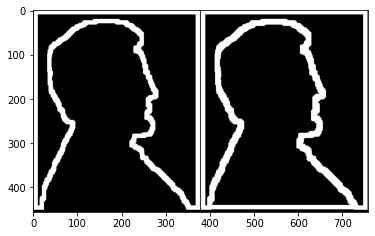

In [45]:
img2 = img_erode - img_dilate
plt.imshow(img2,'gray')

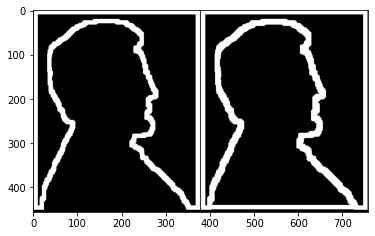

In [46]:
img3 = img_dilate - img_erode
plt.imshow(img3,'gray')

--2020-12-03 22:06:35--  https://github.com/Henry-Medeiros/images/raw/master/humans.png
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Henry-Medeiros/images/master/humans.png [following]
--2020-12-03 22:06:35--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/humans.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24020 (23K) [image/png]
Saving to: ‘humans.png.2’

humans.png.2        100%[===================>]  23.46K  --.-KB/s    in 0.001s  

2020-12-03 22:06:35 (25.2 MB/s) - ‘humans.png.2’ saved [24020/24020]



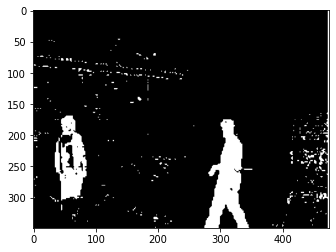

In [57]:
import cv2
import scipy
import matplotlib.pyplot as plt
from IPython.display import Image, display
import numpy as np
!wget 'https://github.com/Henry-Medeiros/images/raw/master/humans.png'
img = cv2.imread('humans.png',0)
thr, img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

plt.imshow(img,'gray')
plt.show()

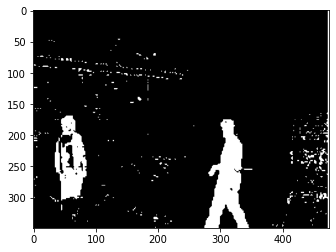

In [58]:
thr, img = cv2.threshold(img, 127,255, cv2.THRESH_BINARY)
img = (img >thr).astype(np.uint8)
plt.imshow(img,'gray')

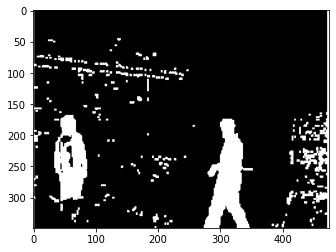

In [59]:
# Dilation
se = np.ones((3,3), np.uint8)
img_dilate = cv2.dilate(img, se)
plt.imshow(255*img_dilate, 'gray')
plt.show()

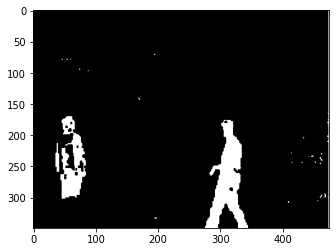

In [62]:
# Erosion
se = np.ones((3,3), np.uint8)
img_erosion = cv2.erode(img, se)
plt.imshow(255*img_erosion, 'gray')
plt.show()

solve some remaining 
opening

repeat erosion again


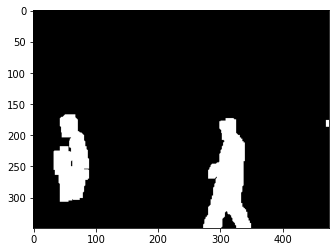

In [67]:
se = np.ones((2,2), np.uint8)

# img_erosion = cv2.erode(img, se)
# img_erosion = cv2.erode(img_erosion, se)
# img_dilate = cv2.dilate(img_erosion, se)
# img_dilate = cv2.dilate(img_dilate, se)
#or using iteration!

img_erosion = cv2.erode(img_erosion, se, iterations= 2)

img_dilate = cv2.dilate(img_dilate, se, iterations= 2)


plt.imshow(255*img_dilate, 'gray')
plt.show()

--2020-12-03 22:02:37--  https://github.com/Henry-Medeiros/images/raw/master/Marquette.jpg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Henry-Medeiros/images/master/Marquette.jpg [following]
--2020-12-03 22:02:38--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/Marquette.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 482326 (471K) [image/jpeg]
Saving to: ‘Marquette.jpg.1’

Marquette.jpg.1     100%[===================>] 471.02K  --.-KB/s    in 0.04s   

2020-12-03 22:02:38 (10.5 MB/s) - ‘Marquette.jpg.1’ saved [482326/482326]



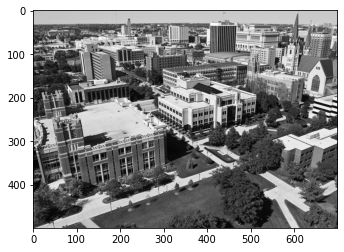

In [52]:
import cv2
import scipy
import matplotlib.pyplot as plt
from IPython.display import Image, display
import numpy as np
!wget 'https://github.com/Henry-Medeiros/images/raw/master/Marquette.jpg'
img = cv2.imread('Marquette.jpg',0)
# thr, img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

plt.imshow(img,'gray')
plt.show()

In grayscale images, using min pixl value for erosion and dilation

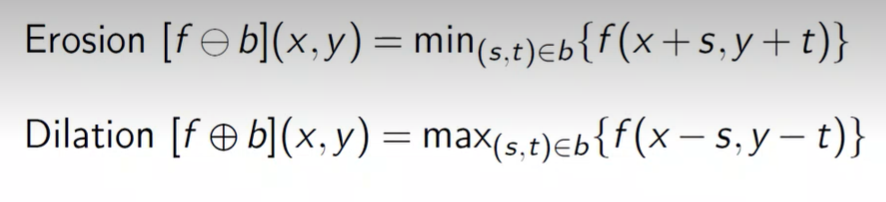

--2020-12-03 22:55:28--  https://github.com/Henry-Medeiros/images/raw/master/Marquette.jpg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Henry-Medeiros/images/master/Marquette.jpg [following]
--2020-12-03 22:55:28--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/Marquette.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 482326 (471K) [image/jpeg]
Saving to: ‘Marquette.jpg.2’

Marquette.jpg.2     100%[===================>] 471.02K  --.-KB/s    in 0.04s   

2020-12-03 22:55:28 (10.5 MB/s) - ‘Marquette.jpg.2’ saved [482326/482326]



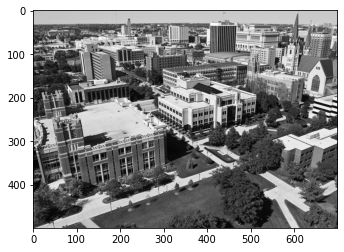

In [69]:

import cv2
import scipy
import matplotlib.pyplot as plt
from IPython.display import Image, display
import numpy as np
!wget 'https://github.com/Henry-Medeiros/images/raw/master/Marquette.jpg'
img = cv2.imread('Marquette.jpg',0)

plt.imshow(img,'gray')
plt.show()



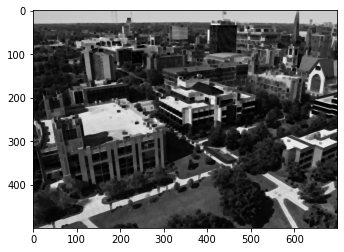

In [72]:
# Using Flat square SE
# erosion make darker ==> lower the intensity
se = np.ones((5,5), np.uint8)
img_erode = cv2.erode(img, se)
plt.imshow(img_erode, 'gray')
plt.show()


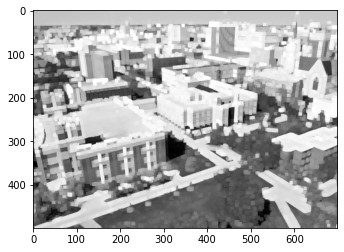

In [73]:
# dilation makes it brighter ( up the intensity)
se = np.ones((7,7), np.uint8)
img_dilate = cv2.dilate(img, se)
plt.imshow(img_dilate, 'gray')
plt.show()
